In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d:\anacoda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#run once
data = pd.read_csv('all_synthetic_data2.csv')

In [5]:
sampled_df_500 = data.sample(n=500_000, random_state=42).reset_index(drop=True)


sampled_df_500.to_csv("sampled_synthetic_data_500.csv", index=False)

In [2]:
sampled_data_500 = pd.read_csv('sampled_synthetic_data_500.csv')
D_500 = sampled_data_500.to_numpy()
D_500 = np.delete(D_500, 3, axis=1)

In [ ]:
#do not run again for reproducibility
import importlib
import QNDLR
importlib.reload(QNDLR)

from QNDLR import QNDLR
theta_c = QNDLR(D_500, 0.05, 0.1, 1.5,0)
theta_c

In [ ]:
def predict(X, theta):
    return X * theta  

In [5]:
X = np.array([x for x, _, _ in D_500])
Y = np.array([y for _, y, _ in D_500])
T = np.array([t for _, _, t in D_500])

In [6]:
theta_c = 0.95975586

In [7]:
Y_pred = predict(X, theta_c)

In [29]:
def compute_discrimination_statistic_QNDLR(X,Y,T, theta_c):
    """Computes d(θ) as the difference in mean prediction errors between T=0 and T=1."""
    group_A_mask = T == 0
    group_B_mask = T == 1

    y_pred = theta_c * X

    # Group-wise predictions and true values
    y_A_pred = y_pred[group_A_mask]
    y_B_pred = y_pred[group_B_mask]     
    # True values
    y_A_true = Y[group_A_mask]
    y_B_true = Y[group_B_mask]

    # Compute mean error for each group
    mean_A = np.mean(y_A_pred - y_A_true)
    mean_B = np.mean(y_B_pred - y_B_true)

    # Compute discrimination statistic
    d_theta = mean_A - mean_B
    return d_theta

In [31]:
compute_discrimination_statistic_QNDLR(X,Y,T, theta_c)

-0.08111987614507085

In [7]:
plt.figure(figsize=(10, 6)) 

# Scatter plot with small, sharp, color-coded data points
plt.scatter(
    X, 
    Y, 
    c=T, 
    cmap='coolwarm',
    s=10, 
    edgecolors='k', 
    linewidths=0.2
)

# Plot regression line using optimal theta
x_line = np.linspace(-3, 3, 1000)
y_line = theta_c * x_line
plt.plot(x_line, y_line, color='black', linewidth=2)

# Plot settings
plt.title('')
plt.xlabel('aptitude')
plt.ylabel('exam score')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()


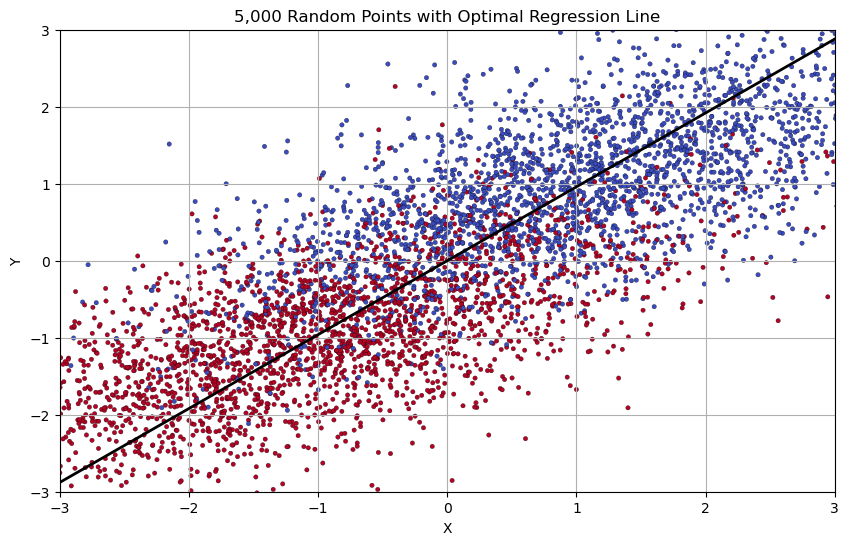

In [8]:
indices = np.random.choice(len(X), size=5000, replace=False)

# Subset the data
X_subset = X[indices]
Y_subset = Y[indices]
T_subset = T[indices]

# Plot
plt.figure(figsize=(10, 6)) 

plt.scatter(
    X_subset, 
    Y_subset, 
    c=T_subset, 
    cmap='coolwarm',
    s=10, 
    edgecolors='k', 
    linewidths=0.2
)

# Regression line
x_line = np.linspace(-3, 3, 1000)
y_line = theta_c * x_line
plt.plot(x_line, y_line, color='black', linewidth=2)

# Plot settings
plt.title('5,000 Random Points with Optimal Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()

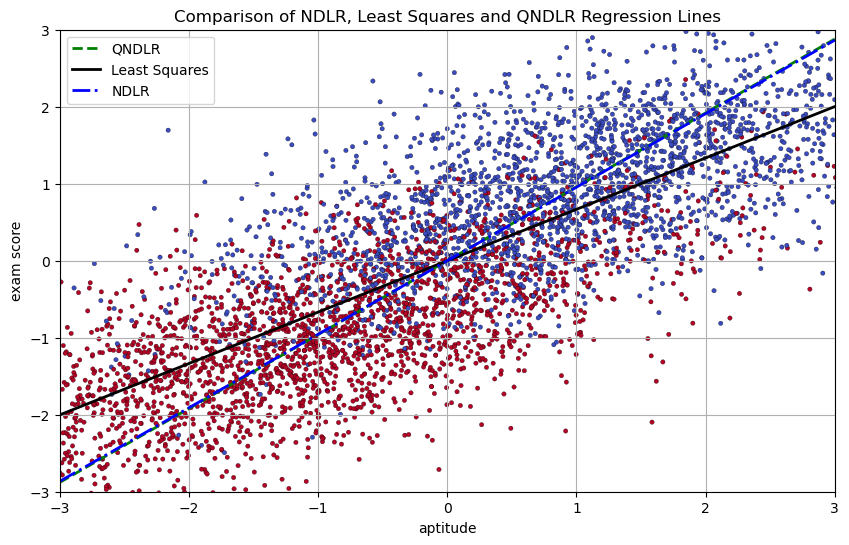

In [8]:
X_2d = X.reshape(-1, 1)
X_with_bias = np.hstack([np.ones_like(X_2d), X_2d])  # add intercept
theta_ls, _, _, _ = np.linalg.lstsq(X_with_bias, Y, rcond=None)

# Step 2: Take a random sample of 5,000 points
np.random.seed(42)  # for reproducibility
indices = np.random.choice(len(X), size=5000, replace=False)
X_subset = X[indices]
Y_subset = Y[indices]
T_subset = T[indices]

# Step 3: Plot everything
plt.figure(figsize=(10, 6)) 

# Plot 5,000 points
scatter = plt.scatter(
    X_subset, 
    Y_subset, 
    c=T_subset, 
    cmap='coolwarm', 
    s=10, 
    edgecolors='k', 
    linewidths=0.2
)

# Plot regression lines
x_line = np.linspace(-3, 3, 1000)

# Optimal theta line
y_opt_qndlr = theta_c * x_line
plt.plot(x_line, y_opt_qndlr, color='green', linestyle='--', linewidth=2, label='QNDLR')

# Least squares line
y_ls = theta_ls[0] + theta_ls[1] * x_line
plt.plot(x_line, y_ls, color='black', linewidth=2, label='Least Squares')

# Theta = 0.9 line
y_opt_ndlr = 0.95488412 * x_line
plt.plot(x_line, y_opt_ndlr, color='blue', linestyle='-.', linewidth=2, label='NDLR')

# Final plot settings
plt.title('Comparison of NDLR, Least Squares and QNDLR Regression Lines')
plt.xlabel('aptitude')
plt.ylabel('exam score')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.legend()
plt.show()

In [33]:
def compute_discrimination_statistic_NDLR(X,Y,T, theta_c):
    """Computes d(θ) as the difference in mean prediction errors between T=0 and T=1."""
    group_A_mask = T == 0
    group_B_mask = T == 1

    y_pred = theta_c * X

    # Group-wise predictions and true values
    y_A_pred = y_pred[group_A_mask]
    y_B_pred = y_pred[group_B_mask]     
    # True values
    y_A_true = Y[group_A_mask]
    y_B_true = Y[group_B_mask]

    # Compute mean error for each group
    mean_A = np.mean(y_A_pred - y_A_true)
    mean_B = np.mean(y_B_pred - y_B_true)

    # Compute discrimination statistic
    d_theta = mean_A - mean_B
    return d_theta

In [5]:
import importlib
import ndlr3
importlib.reload(ndlr3)

from ndlr3 import NDLR


In [3]:
theta_c = 0.95975586

Running trial 1 of 100 for m = 100
❌ Unfair theta=[-0.08704546] → Penalty=5.109622, UB=2.959622 > epsilon=0.1
❌ Unfair theta=[-0.09139774] → Penalty=5.122473, UB=2.972473 > epsilon=0.1
❌ Unfair theta=[-0.08269319] → Penalty=5.096779, UB=2.946779 > epsilon=0.1
❌ Unfair theta=[-0.07834092] → Penalty=5.083945, UB=2.933945 > epsilon=0.1
❌ Unfair theta=[-0.06963637] → Penalty=5.058302, UB=2.908302 > epsilon=0.1
❌ Unfair theta=[-0.06093182] → Penalty=5.032696, UB=2.882696 > epsilon=0.1
❌ Unfair theta=[-0.04352273] → Penalty=4.981596, UB=2.831596 > epsilon=0.1
❌ Unfair theta=[-0.02611364] → Penalty=4.930659, UB=2.780659 > epsilon=0.1
❌ Unfair theta=[0.00870455] → Penalty=4.829329, UB=2.679329 > epsilon=0.1
❌ Unfair theta=[0.04352273] → Penalty=4.728836, UB=2.578836 > epsilon=0.1
❌ Unfair theta=[0.1131591] → Penalty=4.531001, UB=2.381001 > epsilon=0.1
❌ Unfair theta=[0.18279547] → Penalty=4.338686, UB=2.188686 > epsilon=0.1
❌ Unfair theta=[0.32206821] → Penalty=3.977763, UB=1.827763 > epsilon=

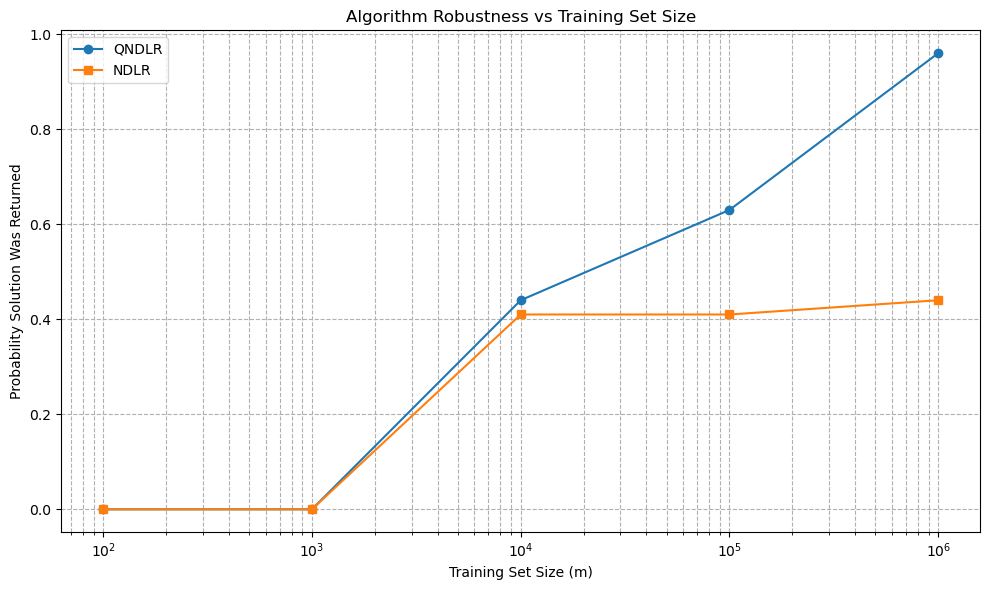

In [16]:
m_values = [10**2, 10**3, 10**4, 10**5, 10**6]
trials = 100
prob_qndlr = []
prob_ndlr = []

for m in m_values:
    success_q = 0
    success_n = 0

    for trial in range(trials):

        print(f"Running trial {trial + 1} of {trials} for m = {m}")

        sampled_df_m = data.sample(n=m).reset_index(drop=True)

        D = sampled_df_m.to_numpy()

        D = np.delete(D, 3, axis=1)

        if QNDLR(D, 0.05, 0.1, 1.5,0) != "No Solution Found":
            success_q += 1
        if NDLR(D, 0.05, 0.1, 1.5) != "No Solution Found":
            success_n += 1

    prob_qndlr.append(success_q / trials)
    prob_ndlr.append(success_n / trials)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(m_values, prob_qndlr, label="QNDLR", marker='o')
plt.plot(m_values, prob_ndlr, label="NDLR", marker='s')

plt.xscale('log')
plt.xlabel("Training Set Size (m)")
plt.ylabel("Probability Solution Was Returned")
plt.title("Algorithm Robustness vs Training Set Size")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

In [8]:
def compute_discrimination_statistic1(D, theta):
    group_A = D[D[:, 2] == 0]  # group with T=0
    group_B = D[D[:, 2] == 1]  # Group B (T=1)
    
    # Predictions for each group
    y_A_pred = predict(group_A[:, [0]], theta)
    y_B_pred = predict(group_B[:, [0]], theta)

    # True values
    y_A_true = group_A[:, 1]
    y_B_true = group_B[:, 1]

    # Compute mean error for each group
    mean_A = np.mean(y_A_pred.ravel()- y_A_true.ravel())
    mean_B = np.mean(y_B_pred.ravel()- y_B_true.ravel())

    # Compute discrimination statistic
    d_theta = mean_A - mean_B
    return d_theta

In [9]:
def compute_discrimination_statistic2(D, model):
    """Computes d(θ) as the difference in mean prediction errors between T=0 and T=1."""
    group_A = D[D[:, 2] == 0]  # group with T=0
    group_B = D[D[:, 2] == 1]
    
    # Predictions for each group
    y_A_pred = model.predict(group_A[:, [0]])  # double brackets to keep 2D shape
    y_B_pred = model.predict(group_B[:, [0]])

    # True values
    y_A_true = group_A[:, 1]
    y_B_true = group_B[:, 1]

    # Compute mean error for each group
    mean_A = np.mean(y_A_pred.ravel()- y_A_true.ravel())
    mean_B = np.mean(y_B_pred.ravel()- y_B_true.ravel())

    # Compute discrimination statistic
    d_theta = mean_A - mean_B
    return d_theta

In [37]:
m_values = [10**2, 10**3, 10**4, 10**5, 10**6]
trials = 5
epsilon = 0.1

prob_qndlr_disc = []
prob_ndlr_disc = []
prob_lr_disc = []

for m in m_values:
    high_disc_q = 0
    high_disc_n = 0
    high_disc_lr = 0
    
    for trial in range(trials):
        print(f"Running trial {trial + 1} of {trials} for m = {m}")
        
        sampled_df_m = data.sample(n=m).reset_index(drop=True)
        D = sampled_df_m.to_numpy()
        D = np.delete(D, 3, axis=1)  # Removing sensitive attribute

        X = np.array([x for x, _, _ in D])
        Y = np.array([y for _, y, _ in D])
        T = np.array([t for _, _, t in D]) 
        
        # QNDLR
        theta_qndlr = QNDLR(D, 0.05, 0.1, 1.5, 0)
        if theta_qndlr != "No Solution Found":
            d_theta_qndlr = compute_discrimination_statistic_QNDLR(X,Y,T, theta_qndlr)
            print('QNDLR discrimination:', d_theta_qndlr)
            if d_theta_qndlr > epsilon  or d_theta_qndlr < -epsilon:
                high_disc_q += 1

        # NDLR
        theta_ndlr = NDLR(D, 0.05, 0.1, 1.5)
        if theta_ndlr != "No Solution Found":
            d_theta_ndlr = compute_discrimination_statistic_NDLR(X,Y,T, theta_ndlr)
            print(d_theta_ndlr)
            if d_theta_ndlr > epsilon or d_theta_ndlr < -epsilon:
                high_disc_n += 1
 

        # Linear Regression
        model = LinearRegression()
        X = X.reshape(-1, 1)
        model.fit(X, Y)
        d_theta_lr = compute_discrimination_statistic2(D,model)
        print(d_theta_lr)
        if d_theta_lr > epsilon or d_theta_lr < -epsilon:
            high_disc_lr += 1


    prob_qndlr_disc.append(high_disc_q / trials)
    prob_ndlr_disc.append(high_disc_n / trials)
    prob_lr_disc.append(high_disc_lr / trials)

Running trial 1 of 5 for m = 100
❌ Unfair theta=[-0.02645629] → Penalty=4.788825, UB=2.638825 > epsilon=0.1
❌ Unfair theta=[-0.0277791] → Penalty=4.791596, UB=2.641596 > epsilon=0.1
❌ Unfair theta=[-0.02513347] → Penalty=4.786054, UB=2.636054 > epsilon=0.1
❌ Unfair theta=[-0.02381066] → Penalty=4.783284, UB=2.633284 > epsilon=0.1
❌ Unfair theta=[-0.02116503] → Penalty=4.777743, UB=2.627743 > epsilon=0.1
❌ Unfair theta=[-0.0185194] → Penalty=4.772203, UB=2.622203 > epsilon=0.1
❌ Unfair theta=[-0.01322814] → Penalty=4.761125, UB=2.611125 > epsilon=0.1
❌ Unfair theta=[-0.00793689] → Penalty=4.750050, UB=2.600050 > epsilon=0.1
❌ Unfair theta=[0.00264563] → Penalty=4.727908, UB=2.577908 > epsilon=0.1
❌ Unfair theta=[0.01322814] → Penalty=4.705776, UB=2.555776 > epsilon=0.1
❌ Unfair theta=[0.03439317] → Penalty=4.661548, UB=2.511548 > epsilon=0.1
❌ Unfair theta=[0.05555821] → Penalty=4.617366, UB=2.467366 > epsilon=0.1
❌ Unfair theta=[0.09788827] → Penalty=4.529148, UB=2.379148 > epsilon=0.1

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(m_values, prob_qndlr_disc, label="QNDLR (d(θ) > ε)", marker='o')
plt.plot(m_values, prob_ndlr_disc, label="NDLR (d(θ) > ε)", marker='s')
plt.plot(m_values, prob_lr_disc, label="LR (d(θ) > ε)", marker='^')

plt.xscale('log')
plt.xlabel("Training Set Size (m)")
plt.ylabel("Probability d(θ) > ε")
plt.title("Probability of Over-discriminating Solution vs Training Set Size")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

❌ Unfair theta=[0.07261404] → Penalty=3.699291, UB=1.549291 > epsilon=0.1
❌ Unfair theta=[0.07624474] → Penalty=3.694246, UB=1.544246 > epsilon=0.1
❌ Unfair theta=[0.07987544] → Penalty=3.689208, UB=1.539208 > epsilon=0.1
❌ Unfair theta=[0.08350614] → Penalty=3.684177, UB=1.534177 > epsilon=0.1
❌ Unfair theta=[0.09076755] → Penalty=3.674140, UB=1.524140 > epsilon=0.1
❌ Unfair theta=[0.09802895] → Penalty=3.664136, UB=1.514136 > epsilon=0.1
❌ Unfair theta=[0.11255176] → Penalty=3.644228, UB=1.494228 > epsilon=0.1
❌ Unfair theta=[0.12707457] → Penalty=3.624460, UB=1.474460 > epsilon=0.1
❌ Unfair theta=[0.15612018] → Penalty=3.585372, UB=1.435372 > epsilon=0.1
❌ Unfair theta=[0.1851658] → Penalty=3.546931, UB=1.396931 > epsilon=0.1
❌ Unfair theta=[0.24325703] → Penalty=3.472222, UB=1.322222 > epsilon=0.1
❌ Unfair theta=[0.30134826] → Penalty=3.400762, UB=1.250762 > epsilon=0.1
❌ Unfair theta=[0.41753072] → Penalty=3.268609, UB=1.118609 > epsilon=0.1
❌ Unfair theta=[0.53371318] → Penalty=3

C:\Users\eleni\AppData\Local\Temp\ipykernel_21144\1672641052.py:44: RuntimeWarning: Mean of empty slice
  mse_qndlr.append(np.nanmean(mse_qndlr_list))
C:\Users\eleni\AppData\Local\Temp\ipykernel_21144\1672641052.py:45: RuntimeWarning: Mean of empty slice
  mse_ndlr.append(np.nanmean(mse_ndlr_list))


❌ Unfair theta=[0.05794375] → Penalty=4.451289, UB=2.301289 > epsilon=0.1
❌ Unfair theta=[0.06084093] → Penalty=4.443991, UB=2.293991 > epsilon=0.1
❌ Unfair theta=[0.06373812] → Penalty=4.436694, UB=2.286694 > epsilon=0.1
❌ Unfair theta=[0.06663531] → Penalty=4.429398, UB=2.279398 > epsilon=0.1
❌ Unfair theta=[0.07242968] → Penalty=4.414810, UB=2.264810 > epsilon=0.1
❌ Unfair theta=[0.07822406] → Penalty=4.400227, UB=2.250227 > epsilon=0.1
❌ Unfair theta=[0.08981281] → Penalty=4.371074, UB=2.221074 > epsilon=0.1
❌ Unfair theta=[0.10140156] → Penalty=4.341942, UB=2.191942 > epsilon=0.1
❌ Unfair theta=[0.12457906] → Penalty=4.283737, UB=2.133737 > epsilon=0.1
❌ Unfair theta=[0.14775656] → Penalty=4.225618, UB=2.075618 > epsilon=0.1
❌ Unfair theta=[0.19411155] → Penalty=4.109653, UB=1.959653 > epsilon=0.1
❌ Unfair theta=[0.24046655] → Penalty=3.994086, UB=1.844086 > epsilon=0.1
❌ Unfair theta=[0.33317655] → Penalty=3.764295, UB=1.614295 > epsilon=0.1
❌ Unfair theta=[0.42588654] → Penalty=

C:\Users\eleni\AppData\Local\Temp\ipykernel_21144\1672641052.py:44: RuntimeWarning: Mean of empty slice
  mse_qndlr.append(np.nanmean(mse_qndlr_list))
C:\Users\eleni\AppData\Local\Temp\ipykernel_21144\1672641052.py:45: RuntimeWarning: Mean of empty slice
  mse_ndlr.append(np.nanmean(mse_ndlr_list))


❌ Unfair theta=[0.04189889] → Penalty=4.299815, UB=2.149815 > epsilon=0.1
❌ Unfair theta=[0.04399384] → Penalty=4.295097, UB=2.145097 > epsilon=0.1
❌ Unfair theta=[0.04608878] → Penalty=4.290379, UB=2.140379 > epsilon=0.1
❌ Unfair theta=[0.04818372] → Penalty=4.285661, UB=2.135661 > epsilon=0.1
❌ Unfair theta=[0.05237361] → Penalty=4.276227, UB=2.126227 > epsilon=0.1
❌ Unfair theta=[0.0565635] → Penalty=4.266793, UB=2.116793 > epsilon=0.1
❌ Unfair theta=[0.06494328] → Penalty=4.247927, UB=2.097927 > epsilon=0.1
❌ Unfair theta=[0.07332306] → Penalty=4.229063, UB=2.079063 > epsilon=0.1
❌ Unfair theta=[0.09008262] → Penalty=4.191345, UB=2.041345 > epsilon=0.1
❌ Unfair theta=[0.10684217] → Penalty=4.153639, UB=2.003639 > epsilon=0.1
❌ Unfair theta=[0.14036129] → Penalty=4.078263, UB=1.928263 > epsilon=0.1
❌ Unfair theta=[0.1738804] → Penalty=4.002942, UB=1.852942 > epsilon=0.1
❌ Unfair theta=[0.24091862] → Penalty=3.852486, UB=1.702486 > epsilon=0.1
❌ Unfair theta=[0.30795685] → Penalty=3.

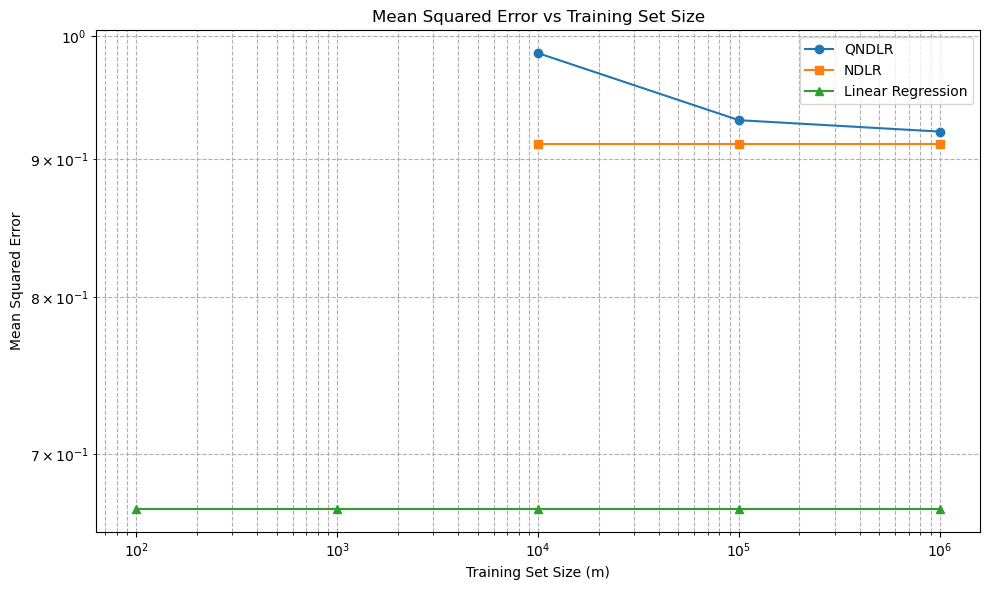

In [40]:
m_values = [10**2, 10**3, 10**4, 10**5, 10**6]
trials = 20

mse_qndlr = []
mse_ndlr = []
mse_lr = []

for m in m_values:
    mse_qndlr_list = []
    mse_ndlr_list = []
    mse_lr_list = []

    for _ in range(trials):
        sampled_df_m = data.sample(n=m).reset_index(drop=True)
        D = sampled_df_m.to_numpy()
        D = np.delete(D, 3, axis=1)  # adjust as per your data structure

        # QNDLR
        theta_qndlr = QNDLR(D, 0.05, 0.1, 1.5, 0)
        if theta_qndlr != "No Solution Found":
            # Prediction (including intercept)
            y_pred_qndlr = predict(X, theta_qndlr)
            mse_qndlr_list.append(mean_squared_error(Y, y_pred_qndlr))
        else:
            # Assign large MSE if no solution found
            mse_qndlr_list.append(np.nan)

        # NDLR
        theta_n = NDLR(D, 0.05, 0.1, 1.5)
        if theta_n != "No Solution Found":
            y_pred_ndlr = predict(X, theta_ndlr)
            mse_ndlr_list.append(mean_squared_error(Y, y_pred_ndlr))
        else:
            mse_ndlr_list.append(np.nan)

        # Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(X, Y)
        theta_lr = np.hstack([lr_model.intercept_, lr_model.coef_])
        y_pred_lr = np.dot(np.hstack([np.ones((X.shape[0],1)), X]), theta_lr)
        mse_lr_list.append(mean_squared_error(Y, y_pred_lr))

    # Average MSE ignoring NaNs
    mse_qndlr.append(np.nanmean(mse_qndlr_list))
    mse_ndlr.append(np.nanmean(mse_ndlr_list))
    mse_lr.append(np.nanmean(mse_lr_list))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(m_values, mse_qndlr, label="QNDLR", marker='o')
plt.plot(m_values, mse_ndlr, label="NDLR", marker='s')
plt.plot(m_values, mse_lr, label="Linear Regression", marker='^')

plt.xscale('log')
plt.yscale('log')  # MSE often benefits from log scale too
plt.xlabel("Training Set Size (m)")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Training Set Size")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

❌ Unfair theta=[0.0885238] → Penalty=4.416572, UB=2.266572 > epsilon=0.1
❌ Unfair theta=[0.09294999] → Penalty=4.408938, UB=2.258938 > epsilon=0.1
❌ Unfair theta=[0.09737618] → Penalty=4.401308, UB=2.251308 > epsilon=0.1
❌ Unfair theta=[0.10180237] → Penalty=4.393682, UB=2.243682 > epsilon=0.1
❌ Unfair theta=[0.11065475] → Penalty=4.378439, UB=2.228439 > epsilon=0.1
❌ Unfair theta=[0.11950713] → Penalty=4.363212, UB=2.213212 > epsilon=0.1
❌ Unfair theta=[0.13721189] → Penalty=4.332803, UB=2.182803 > epsilon=0.1
❌ Unfair theta=[0.15491665] → Penalty=4.302459, UB=2.152459 > epsilon=0.1
❌ Unfair theta=[0.19032617] → Penalty=4.241987, UB=2.091987 > epsilon=0.1
❌ Unfair theta=[0.22573569] → Penalty=4.181839, UB=2.031839 > epsilon=0.1
❌ Unfair theta=[0.29655473] → Penalty=4.062733, UB=1.912733 > epsilon=0.1
❌ Unfair theta=[0.36737377] → Penalty=3.945681, UB=1.795681 > epsilon=0.1
❌ Unfair theta=[0.50901186] → Penalty=3.720974, UB=1.570974 > epsilon=0.1
❌ Unfair theta=[0.65064994] → Penalty=3

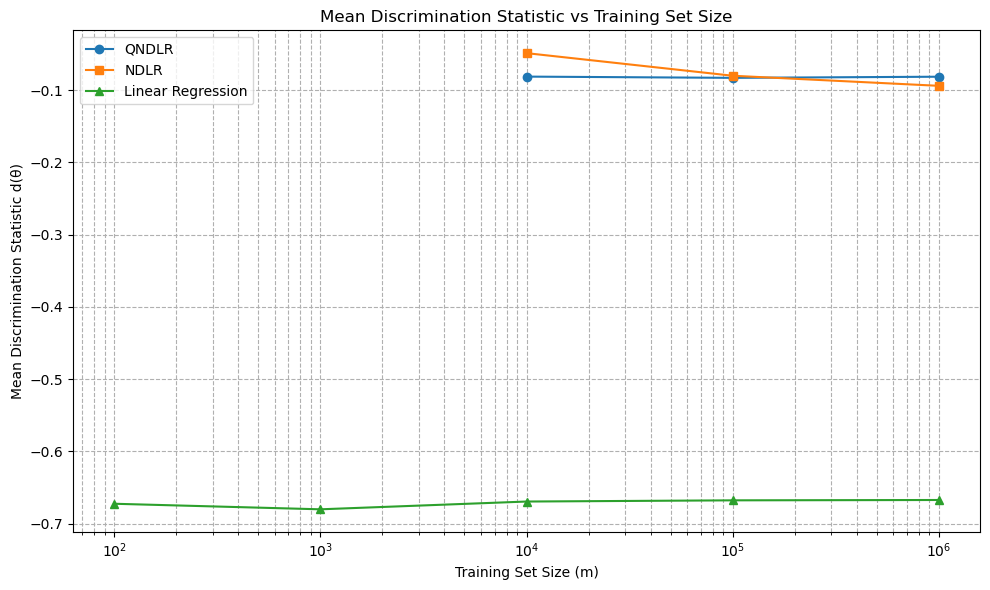

In [42]:
m_values = [10**2, 10**3, 10**4, 10**5, 10**6]
trials = 20

mean_disc_qndlr = []
mean_disc_ndlr = []
mean_disc_lr = []

for m in m_values:
    disc_qndlr_list = []
    disc_ndlr_list = []
    disc_lr_list = []

    for _ in range(trials):
        sampled_df_m = data.sample(n=m).reset_index(drop=True)
        D = sampled_df_m.to_numpy()
        D = np.delete(D, 3, axis=1)  # adjust if needed
        
        X = np.array([x for x, _, _ in D])
        Y = np.array([y for _, y, _ in D])
        T = np.array([t for _, _, t in D])
        # QNDLR
        theta_q = QNDLR(D, 0.05, 0.1, 1.5, 0)
        if theta_q != "No Solution Found":
            d_theta_qndlr = compute_discrimination_statistic1(D, theta_qndlr)
            disc_qndlr_list.append(d_theta_qndlr)

        # NDLR
        theta_ndlr = NDLR(D, 0.05, 0.1, 1.5)
        if theta_ndlr != "No Solution Found":
            d_theta_ndlr = compute_discrimination_statistic1(D, theta_ndlr)
            disc_ndlr_list.append(d_theta_ndlr)
        # Linear Regression

        lr_model = LinearRegression()
        X = X.reshape(-1, 1)
        lr_model.fit(X, Y)
        d_theta_lr = compute_discrimination_statistic2(D,model)
        disc_lr_list.append(d_theta_lr)

    # Average discrimination, ignore cases with no solution
    mean_disc_qndlr.append(np.mean(disc_qndlr_list) if disc_qndlr_list else np.nan)
    mean_disc_ndlr.append(np.mean(disc_ndlr_list) if disc_ndlr_list else np.nan)
    mean_disc_lr.append(np.mean(disc_lr_list))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(m_values, mean_disc_qndlr, label="QNDLR", marker='o')
plt.plot(m_values, mean_disc_ndlr, label="NDLR", marker='s')
plt.plot(m_values, mean_disc_lr, label="Linear Regression", marker='^')

plt.xscale('log')
plt.xlabel("Training Set Size (m)")
plt.ylabel("Mean Discrimination Statistic d(θ)")
plt.title("Mean Discrimination Statistic vs Training Set Size")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()